# Title: Pima Indians Diabetes Database
-
     
  1. Relevant Information:
      Several constraints were placed on the selection of these instances from
      a larger database.  In particular, all patients here are females at
      least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning
      routine that generates and executes digital analogs of perceptron-like
      devices.  It is a unique algorithm; see the paper for details.

2. Number of Instances: 768

3. Number of Attributes: 8 plus class 

4. For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

5. Missing Attribute Values: Yes

6. Class Distribution: (class value 1 is interpreted as "tested positive for diabetes")

<table align="left">
    <tr>
   <td>
   Class Value
   </td>
  
   <td>
    Number of instances
   </td>
   </tr>
    <tr>
   <td>
   0
   </td>
  
   <td>
   500
   </td>
   </tr>
   <tr>
   <td>
   1
   </td>
  
   <td>
   268
   </td>
   </tr>
   
   
   </table>

<HR>

# Machine Learning Project Template

### 1. Prepare Problem
####  a) Load libraries
####  b) Load dataset
### 2. Summarize Data
####  a) Descriptive statistics
####  b) Data visualizations
### 3. Prepare Data
####  a) Data Cleaning
####  b) Feature Selection
####  c) Data Transforms
### 4. Evaluate Algorithms
####  a) Split-out validation dataset
####  b) Test options and evaluation metric
####  c) Spot Check Algorithms
####  d) Compare Algorithms
### 5. Improve Accuracy
####  a) Algorithm Tuning
####  b) Ensembles
### 6. Finalize Model
####  a) Predictions on validation dataset
####  b) Create standalone model on entire training dataset
####  c) Save model for later use

---

### 1.Prepare Problem
#### a.Load libraries
#### b.Load dataset


In [1]:
import os
import math
import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

from mlsettings.settings import load_app_config, get_datafolder_path
from mltools.mlcommon import load_data, print_dataset_info, split_dataset, auto_scatter_simple

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
 
% matplotlib inline 
from numpy import set_printoptions
set_printoptions(precision=4)

In [2]:
load_app_config()
DIRECTORY="pima"
FILENAME ='pima-indians-diabetes.data'
RESPONSE="class"
input_path = get_datafolder_path()

{'UAT': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}, 'PRD': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}, 'DEV': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}, 'REG': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}}
Adding F:\DataSource  to system path
Adding F:\MachineLearning  to system path


In [3]:
def load_dataset(filename=FILENAME,response=RESPONSE):
    input_file = os.path.join(input_path, DIRECTORY, filename)
    input_dataset = load_data(input_file)
    print(" input file is :{0} loaded.".format(input_file))
    #print(input_dataset.head())
    
    try:
        continuous_vars = input_dataset.describe().columns
        print("Continous Variables")
        print(continuous_vars)
    except ValueError:
        print("No continous variables")
    
    try:
        categorical_vars = input_dataset.describe(include=["object"]).columns
        print("Categorical Variables")
        print(categorical_vars)
    except ValueError:
        print("No categorical variables")
        categorical_vars = None
    
    response_column =  [col for col in input_dataset.columns if response in col]
    feature_columns =  [col for col in input_dataset.columns if response not in col]
            
    
    return  input_dataset,feature_columns,response_column


In [4]:
input_dataset,feature_columns,response_column = load_dataset(filename=FILENAME,response=RESPONSE)
X = input_dataset[feature_columns]
y = input_dataset[response_column]

 input file is :F:\DataSource\pima\pima-indians-diabetes.data loaded.
Continous Variables
Index(['pregnant_times', 'glucose_level', 'blood_pressure', 'triceps',
       'serum_insulin', 'bmi', 'diabetes_function', 'age', 'class'],
      dtype='object')
No categorical variables


---

### 2.Summarize Data 
#### a) Descriptive statistics
#### b) Data visualizations


In [5]:
def display_data_descriptives(input_dataset,X,feature_columns,y,response_column):
    print("<{0} {1} {0}>".format("="*40,"feature columns"))
    print(feature_columns)
    print("<{0} {1} {0}>".format("="*40,"data header"))
    print(X.head().to_string())
    print("<{0} {1} {0}>".format("="*40,"response"))
    print(response_column)
    print("<{0} {1} {0}>".format("="*40,"Descriptive Statistics -X"))
    print(X.describe())
    print("<{0} {1} {0}>".format("="*40,"Descriptive Statistics -y"))
    print(y.describe())
    print("<{0} {1} {0}>".format("="*40,"value_count -y"))
    print(y['class'].value_counts())
    print("<{0} {1} {0}>".format("="*40,"Correlation"))
    print(input_dataset.corr(method='pearson'))

In [6]:
pd.set_option('display.width', 120)
pd.set_option('precision', 3)
display_data_descriptives(input_dataset,X,feature_columns,y,response_column)

<======================================== feature columns ========================================>
['pregnant_times', 'glucose_level', 'blood_pressure', 'triceps', 'serum_insulin', 'bmi', 'diabetes_function', 'age']
<======================================== data header ========================================>
   pregnant_times  glucose_level  blood_pressure  triceps  serum_insulin   bmi  diabetes_function  age
0               6            148              72       35              0  33.6              0.627   50
1               1             85              66       29              0  26.6              0.351   31
2               8            183              64        0              0  23.3              0.672   32
3               1             89              66       23             94  28.1              0.167   21
4               0            137              40       35            168  43.1              2.288   33
<======================================== response ==================

### Plot histogram

In [7]:
def plot_hist(input_dataset,feature_columns,response_column,nbins=10):
    all_columns= feature_columns+response_column
    fig = plt.figure(figsize=(12,8))
    rows,col = input_dataset.shape
    for i in range(col):
        ax = fig.add_subplot(3, 3, i+1)
        ax.hist(input_dataset[all_columns[i]], bins=10, histtype='stepfilled', color='cornflowerblue' ,edgecolor='hotpink')
        ax.set_title(all_columns[i])
        
    
    plt.tight_layout()

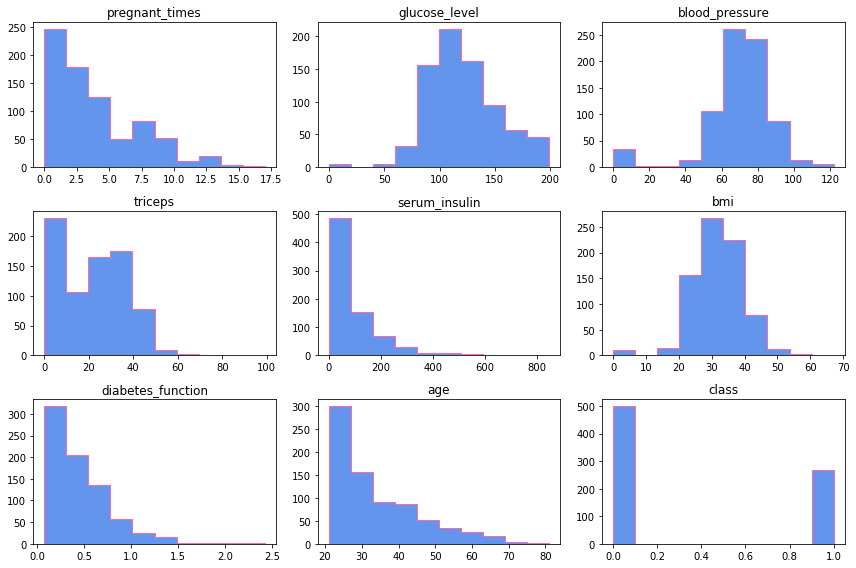

In [8]:
plot_hist(input_dataset,feature_columns,response_column,10)

### Scatter plots 

In [9]:
def plot_scatter(input_dataset,feature_columns,response_column):
    all_columns= feature_columns+response_column
    fig = plt.figure(figsize=(12,9))
    rows,col = input_dataset.shape
    for i in range(col-1):
        ax = fig.add_subplot(3, 3, i+1)
        ax.scatter(input_dataset.iloc[:,i],input_dataset[response_column],marker=".",color='hotpink')
        ax.set_title("{0} vs {1}".format(feature_columns[i],response_column))   
        
    
    plt.tight_layout()

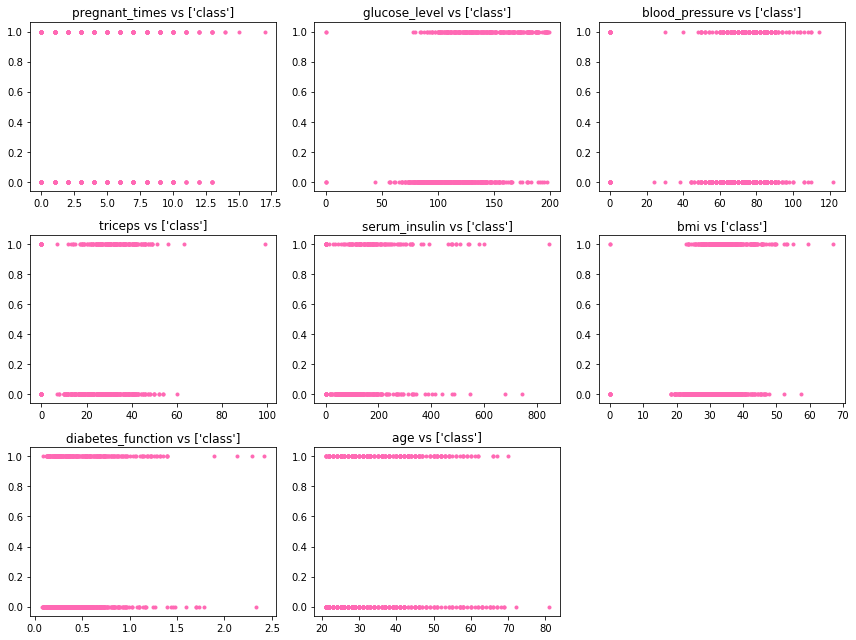

In [10]:
plot_scatter(input_dataset,feature_columns,response_column)

### Plot Heatmap

In [11]:
def plot_heatmap(input_dataset,feature_columns,response_column):
    sns.set(font_scale=1.5)
    cm=input_dataset.corr('pearson')
    f, ax = plt.subplots(figsize=(12,9))
    hm = sns.heatmap(cm,cbar=True,annot=True,square=True,annot_kws={'size': 15},
                     yticklabels=feature_columns+response_column,xticklabels=feature_columns+response_column)
    plt.show()

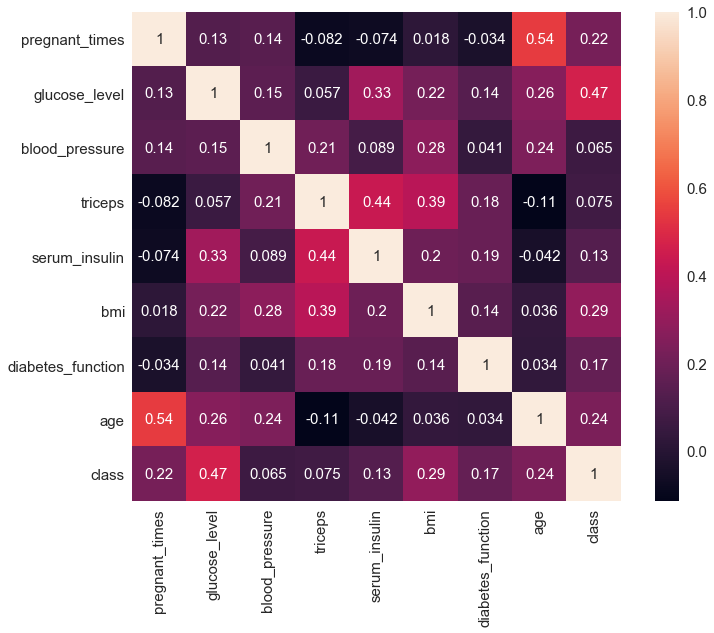

In [12]:
plot_heatmap(input_dataset,feature_columns,response_column)

---  
### 3. Prepare Data
#### a) Data Cleaning
#### b) Feature Selection
#### c) Data Transforms


In [13]:
#Check for missing values
print(input_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant_times       768 non-null int64
glucose_level        768 non-null int64
blood_pressure       768 non-null int64
triceps              768 non-null int64
serum_insulin        768 non-null int64
bmi                  768 non-null float64
diabetes_function    768 non-null float64
age                  768 non-null int64
class                768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


#### As observed from above results we do not have any missing values ,  we will  use standard scaler to standardize data

In [14]:
from sklearn.preprocessing import StandardScaler,Normalizer
def scale_input(input_dataset,feature_columns):
    scaler = StandardScaler().fit(input_dataset[feature_columns].values)
    rescaled_X = scaler.transform(input_dataset[feature_columns].values)
    rescaled_dataset =pd.DataFrame(rescaled_X, columns =feature_columns)
    return rescaled_dataset

In [15]:
rescaled_dataset = scale_input(input_dataset,feature_columns)
print("<{0} {1} {0}>".format("="*40,"Before scaling"))
print(input_dataset.head())
print("<{0} {1} {0}>".format("="*40,"After scaling"))
print(rescaled_dataset.head())

X_scale = rescaled_dataset[feature_columns]
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
#display_data_descriptives(rescaled_dataset,X_scale,feature_columns,y,response_column)
#plot_hist(rescaled_dataset,feature_columns,response_column,10)

<======================================== Before scaling ========================================>
   pregnant_times  glucose_level  blood_pressure  triceps  serum_insulin   bmi  diabetes_function  age  class
0               6            148              72       35              0  33.6              0.627   50      1
1               1             85              66       29              0  26.6              0.351   31      0
2               8            183              64        0              0  23.3              0.672   32      1
3               1             89              66       23             94  28.1              0.167   21      0
4               0            137              40       35            168  43.1              2.288   33      1
<======================================== After scaling ========================================>
   pregnant_times  glucose_level  blood_pressure  triceps  serum_insulin    bmi  diabetes_function    age
0           0.640          0.848     

In [16]:
def normalize_input(input_dataset,feature_columns):
    scaler = Normalizer().fit(input_dataset[feature_columns].values)
    normalize_X = scaler.transform(input_dataset[feature_columns].values)
    set_printoptions(precision=3)
    normalized_dataset =pd.DataFrame(normalize_X, columns =feature_columns)
    return normalized_dataset

In [17]:
normalized_dataset = normalize_input(input_dataset,feature_columns)
print("<{0} {1} {0}>".format("="*40,"Before normalizing"))
print(input_dataset.head())
print("<{0} {1} {0}>".format("="*40,"After normalizing"))
 
normalized_dataset['class'] = y
#X_nmscale =  normalized_dataset[feature_columns]
#print(normalized_dataset.head())
#display_data_descriptives(rescaled_dataset,X_nmscale,feature_columns,y,response_column)
#plot_hist(normalized_dataset,feature_columns,response_column,10)

<======================================== Before normalizing ========================================>
   pregnant_times  glucose_level  blood_pressure  triceps  serum_insulin   bmi  diabetes_function  age  class
0               6            148              72       35              0  33.6              0.627   50      1
1               1             85              66       29              0  26.6              0.351   31      0
2               8            183              64        0              0  23.3              0.672   32      1
3               1             89              66       23             94  28.1              0.167   21      0
4               0            137              40       35            168  43.1              2.288   33      1
<======================================== After normalizing ========================================>


In [18]:
from sklearn.preprocessing import RobustScaler 

def scale_robust(input_dataset,feature_columns):
    scaler = RobustScaler().fit(input_dataset[feature_columns].values)
    rescaled_X = scaler.transform(input_dataset[feature_columns].values)
    rescaled_dataset =pd.DataFrame(rescaled_X, columns =feature_columns)
    return rescaled_dataset


In [19]:
rb_dataset=scale_robust(input_dataset,feature_columns)
#plot_hist(rb_dataset,feature_columns,response_column,15)
#X_rbscale = rescaled_dataset[feature_columns]
#display_data_descriptives(rb_dataset,X_rbscale,feature_columns,y,response_column)

### Feature selection 
Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested. Having irrelevant features in your data can decrease the accuracy of many models, especially linearalgorithms like linear and logistic regression.

#### Top reasons to use feature selection are:
It reduces the complexity of a model and makes it easier to interpret.

It improves the accuracy of a model if the right subset is chosen.

It reduces overfitting.

![alt text](../images/Feature_selection.png "Feature_selection")

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction

def select_features_by_XTree(X,y):
    model = ExtraTreesClassifier()
    model.fit(X, y.values.ravel())

    selected_features =np.array(model.feature_importances_)
    selected_features_X = pd.DataFrame(X.columns.values, columns=['name'])
    selected_features =selected_features.reshape(8,1)

    selected_features_X['model_result'] =selected_features
    selected_features_X =selected_features_X.sort_values(by='model_result',ascending=False)
    return selected_features_X

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def select_features_by_kbest(X,y):
    kbest = SelectKBest(score_func=chi2, k=8)
    kbest_fit = kbest.fit(X, y)
    selected_features =np.array(kbest_fit.scores_)
    selected_features_X = pd.DataFrame(X.columns.values, columns=['name'])
    selected_features =selected_features.reshape(8,1)

    selected_features_X['model_result'] =selected_features
    selected_features_X =selected_features_X.sort_values(by='model_result',ascending=False)
    return selected_features_X
     

In [22]:
features_kbest =select_features_by_kbest(X,y)
print("<{0} {1} {0}>".format("="*40,"Feature Selection by KBest"))
print(features_kbest)
print("<{0} {1} {0}>".format("="*40,"Feature Selection by XTree Classifier"))
features_XTree = select_features_by_XTree(X,y)
print(features_XTree)

<======================================== Feature Selection by KBest ========================================>
                name  model_result
4      serum_insulin      2175.565
1      glucose_level      1411.887
7                age       181.304
5                bmi       127.669
0     pregnant_times       111.520
3            triceps        53.108
2     blood_pressure        17.605
6  diabetes_function         5.393
<======================================== Feature Selection by XTree Classifier ========================================>
                name  model_result
1      glucose_level         0.257
5                bmi         0.142
7                age         0.131
0     pregnant_times         0.112
6  diabetes_function         0.105
2     blood_pressure         0.095
3            triceps         0.085
4      serum_insulin         0.072


### 4. Evaluate Algorithms
####  a) Split-out validation dataset
####  b) Test options and evaluation metric
####  c) Spot Check Algorithms
####  d) Compare Algorithms

In [23]:
# we have two sets normalized dataset and  default dataset 
print(input_dataset.head(5))
print(normalized_dataset.head(5))

   pregnant_times  glucose_level  blood_pressure  triceps  serum_insulin   bmi  diabetes_function  age  class
0               6            148              72       35              0  33.6              0.627   50      1
1               1             85              66       29              0  26.6              0.351   31      0
2               8            183              64        0              0  23.3              0.672   32      1
3               1             89              66       23             94  28.1              0.167   21      0
4               0            137              40       35            168  43.1              2.288   33      1
   pregnant_times  glucose_level  blood_pressure  triceps  serum_insulin    bmi  diabetes_function    age  class
0           0.034          0.828           0.403    0.196          0.000  0.188              0.004  0.280      1
1           0.008          0.716           0.556    0.244          0.000  0.224              0.003  0.261      0
2

In [24]:
from sklearn.model_selection  import  train_test_split
from sklearn.linear_model  import LogisticRegression
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed)
Xstd_train, Xstd_test, ystd_train, ystd_test = train_test_split(normalized_dataset[feature_columns], normalized_dataset[response_column], test_size=test_size,random_state=seed)

In [25]:
logrmodel = LogisticRegression()
logrmodel.fit(X_train, y_train.values.ravel())
result = logrmodel.score(X_test, y_test)
print ("Accuracy: {0:.3f}".format(result*100.0))

Accuracy: 75.591


In [26]:
logrmodel2 = LogisticRegression()
logrmodel2.fit(Xstd_train, ystd_train.values.ravel())
result2 = logrmodel2.score(Xstd_test, ystd_test)
print ("Accuracy: {0:.3f}".format(result2*100.0))

Accuracy: 62.598


#### As shown by accuracy results  normalized dataset  does not perform well, let us check using regularization

In [27]:
logrmodel3 = LogisticRegression(penalty='l1', C=1.0)
logrmodel3.fit(X_train, y_train.values.ravel())
result3 = logrmodel3.score(X_test, y_test)
print ("Accuracy: {0:.3f}".format(result3*100.0))

Accuracy: 77.953


In [28]:
logrmodel4 = LogisticRegression(penalty='l2', C=1.0)
logrmodel4.fit(X_train, y_train.values.ravel())
result4 = logrmodel4.score(X_test, y_test)
print ("Accuracy: {0:.3f}".format(result4*100.0))

Accuracy: 75.591


###### using K fold cross validation

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, y.values.ravel(), cv=kfold)
print ("Accuracy: {0:.3f}%   variance:{1:.3f}%".format(results.mean()*100.0,results.std()*100.0))


Accuracy: 76.951%   variance:4.841%


In [30]:
from sklearn.model_selection import ShuffleSplit
n_splits = 10
test_size = 0.33
seed = 7
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LogisticRegression()
results2 = cross_val_score(model, X, y.values.ravel(), cv=kfold)
print ("Accuracy: {0:.3f}%   variance:{1:.3f}%".format(results.mean()*100.0,results.std()*100.0))

Accuracy: 76.951%   variance:4.841%


### Test options and evaluation metric

In [31]:
print("Logistic regression tested already using K fold cross validation")

Logistic regression tested already using K fold cross validation


In [32]:
def train_and_evaluate(model, X_train, y_train, t_splits =10,seed=7):
    model.fit(X_train, y_train)
    print ("Coefficient of determination on training set:",model.score(X_train, y_train))
    # create a k-fold cross validation iterator of k=5 folds
    cv = KFold(n_splits= t_splits,shuffle=True, random_state=seed)
    scores = cross_val_score(model, X_train, y_train, cv=cv)
    print(scores)
    print ("Average coefficient of determination using {0}-fold crossvalidation:{1}".format(t_splits,np.mean(scores)))

### Checking linear discriminant analysis

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
train_and_evaluate(lda_model,X, y.values.ravel(),10,7)


Coefficient of determination on training set: 0.783854166667
[ 0.805  0.753  0.714  0.792  0.792  0.779  0.662  0.805  0.829  0.737]
Average coefficient of determination using 10-fold crossvalidation:0.7669685577580315


In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
train_and_evaluate(lda_model,normalized_dataset[feature_columns],normalized_dataset[response_column].values.ravel(),10,7)

Coefficient of determination on training set: 0.669270833333
[ 0.61   0.636  0.649  0.714  0.649  0.662  0.701  0.675  0.75   0.539]
Average coefficient of determination using 10-fold crossvalidation:0.6588174982911825


### Comparing Machine learning algorithms

In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Accuracy of LR is 0.7695146958304853 with variance 0.04841051924567195
Accuracy of LDA is 0.773462064251538 with variance 0.05159180390446138
Accuracy of DT is 0.6874401913875597 with variance 0.05898913494541783
Accuracy of KNN is 0.7265550239234451 with variance 0.06182131406705549
Accuracy of GB is 0.7551777170198223 with variance 0.04276593954064409
Accuracy of SVM is 0.6510252904989747 with variance 0.07214083485055327


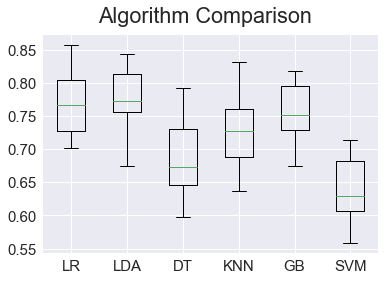

In [36]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('GB',GaussianNB()))
models.append(('SVM',SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, y.values.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "Accuracy of {0} is {1} with variance {2}".format(name, cv_results.mean(), cv_results.std())
    print(msg)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()